## Project Title: Restaurants Rating Prediction & Analytics
_________________________________________________________________

## 1. Introduction -
- In the modern food-tech industry, platforms like Zomato have revolutionized how customers discover and interact with restaurants. For business owners and stakeholders, understanding the factors that drive a restaurant's rating is crucial for survival and growth. This project focuses on building a data-driven solution to predict the Aggregate Rating of a restaurant based on its services, location, and costs.

- By leveraging Machine Learning (ML), we aim to uncover the hidden patterns within restaurant data to determine what makes an establishment successful. This allows new entrants in the market to simulate their potential ratings based on their business model (Cuisines, Price Range, and Services).

## 2. Problem Statement - 
- The primary challenge is to identify which restaurant attributes—such as geographical location, average cost for two, availability of online delivery, and customer engagement (votes)—have the most significant impact on the final rating. The goal is to develop a high-precision regression model that minimizes the error between the predicted and actual user ratings.

## 3. Objectives - 

- Comprehensive Data Cleaning: To handle missing values, duplicate entries, and outliers within the dataset.

- Exploratory Data Analysis (EDA): To visualize the distribution of costs, popular cuisines, and the relationship between price tiers and ratings.

- Feature Engineering: To transform categorical text data (like Cities and Cuisines) into numerical formats suitable for machine learning algorithms.

- Predictive Modeling: To compare multiple algorithms (Linear Regression, Decision Trees, and Random Forest) and optimize the best-performing one using hyperparameter tuning.

## 4. Scope of the Project -
- This project covers the end-to-end data science pipeline:Data Acquisition: Using the Zomato dataset containing thousands of restaurant records.Preprocessing: Label Encoding and Binary Mapping of categorical features.Model Building: Implementing an ensemble-based Random Forest Regressor.Evaluation: Using R-Squared ($R^2$) and Root Mean Squared Error (RMSE) to validate the model’s reliability.

## 5. Abstract (Summary for Report Start) - 
This project presents a systematic approach to predicting restaurant ratings using the Resturants dataset. Through extensive exploratory data analysis and feature optimization, we identified key performance indicators like 'Votes' and 'Price Range'. Our finalized Tuned Random Forest model provides an accurate forecasting tool for stakeholders, enabling them to make informed decisions regarding restaurant positioning and service enhancements in a competitive market.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_column",None)
df=pd.read_csv("Dataset .csv")

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.shape #9551 Rows and 21 columns.

(9551, 21)

## NULL VALUES

In [6]:
print("Total numbers of Null Values in our dataset = ", df.isnull().sum().sum()) #Total null Values = 9.

Total numbers of Null Values in our dataset =  9


In [7]:
print("Total numbers of Null Values in each columns = ", df.isnull().sum()) #Null Values in Cuisines

Total numbers of Null Values in each columns =  Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [8]:
df.dtypes #Cuisines is an object type columns so we will fill it with MODE.

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [9]:
df["Cuisines"].fillna(df["Cuisines"].mode()[0],inplace=True)

/var/folders/kf/_05yv24n4sq4f04ldmhpxh7w0000gn/T/ipykernel_10056/651701199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cuisines"].fillna(df["Cuisines"].mode()[0],inplace=True)


## DUPLICATE ROWS

In [10]:
print("Total duplicates in our dataset" , df.duplicated().sum()) #No duplicates rows

Total duplicates in our dataset 0


## SOME BASIC INSIGHTS FROM OUR DATA

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## KEY INSIGHTS FROM DESCRIBE CHART:-
________________________________________

## 1. The "Low Rating" Surprise
 
- Insight: Majority of restaurants have a rating between 2.5 and 3.5.

- Key Point: Even though we expect restaurants to be "Good," the average rating is only 2.66.

- Observation: There is a huge number of restaurants with a 0.0 rating, which means many are either new or unrated.

## 2. The Popularity Gap (Votes)

- Insight: Most restaurants are "hidden gems" or unknown.

- Key Point: 50% of the restaurants have received fewer than 31 votes.

- Contrast: Only a very small number of "Star" restaurants have massive popularity, with the maximum votes reaching 10,934.

## 3. Pocket-Friendly vs. Luxury

- Insight: This platform is mostly for budget-conscious foodies.

- Key Point: The average Price Range is 1.8, which means most restaurants fall under the "Affordable" category (1 or 2).

- Luxury: Only a tiny fraction of restaurants are in the high-end category (Price Range 4).

## 4. The Currency Confusion

- Insight: You cannot compare "Average Cost for two" directly across all countries.

- Example: In the data, the max cost is 800,000, which is likely in Indonesian Rupiah or another high-value currency.

- Action: To get a real insight, we need to convert everything into one currency (like USD or INR).

## 5. Service Availability

- Insight: Not every restaurant is tech-savvy.

- Observation: From the screenshots, we see many restaurants still don't offer Online Delivery or Table Booking.

## 6.The "Silent Satisfied Customer" & Voting Bias

- The Huge Gap: While the maximum votes for a restaurant reach 10,934, the average (mean) is only 156.

- Skewed Data: This massive difference shows that a very small percentage of restaurants get all the attention, while the majority (over 50%) have fewer than 31 votes.

- The Problem (Low Engagement): The lower average rating of 2.66 might not mean the food is bad; it likely means customers who are satisfied often forget to vote.

- Psychology of Rating: Usually, only extremely happy or extremely angry customers leave a rating. The "Silent Majority" who liked the food but didn't find it "mind-blowing" often skip the feedback process.

- Business Recommendation: To improve the "Aggregate Rating," restaurants should actively encourage customers to vote via QR codes or loyalty points. Increasing the number of votes will lead to a more honest and reliable rating for the business.

## OUTLIERS CHECKING (Visualizations)

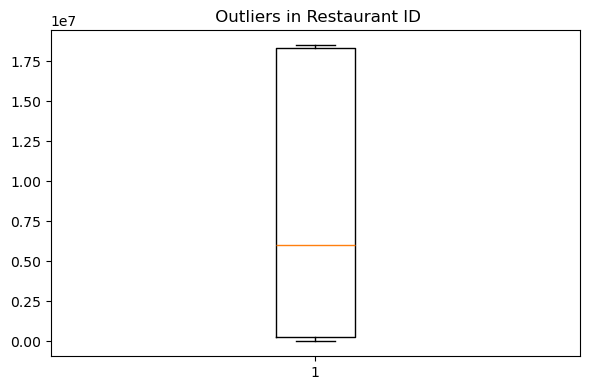

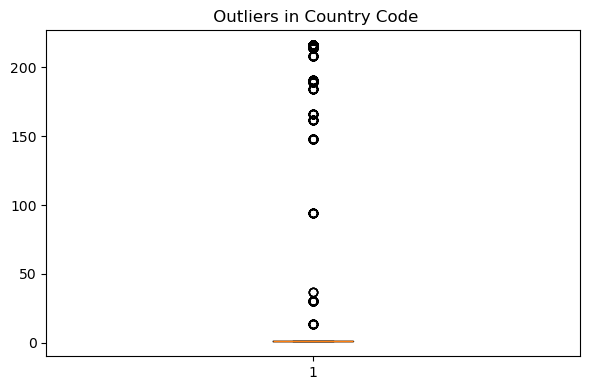

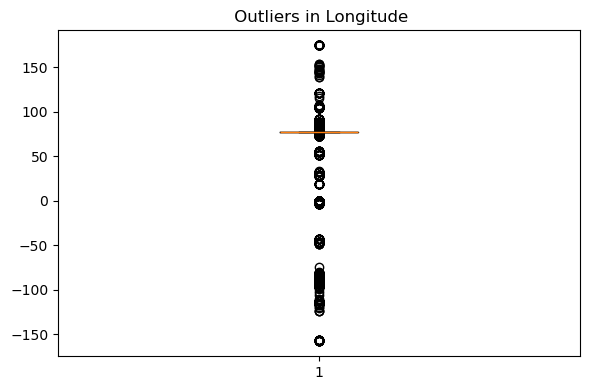

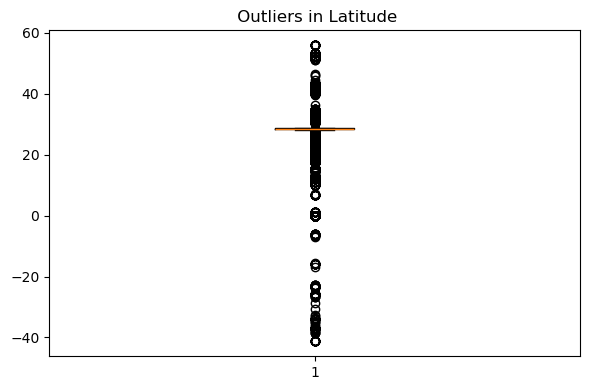

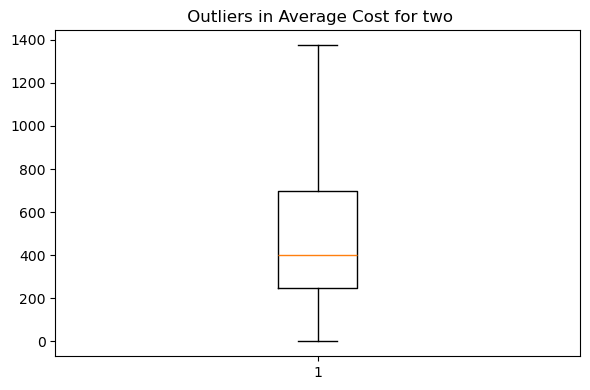

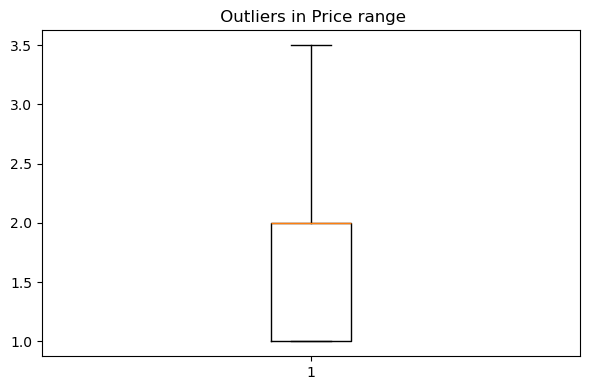

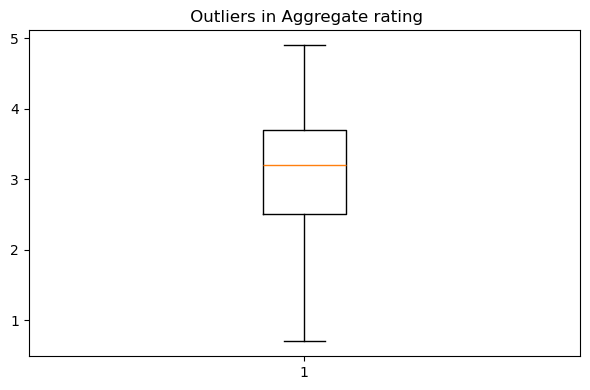

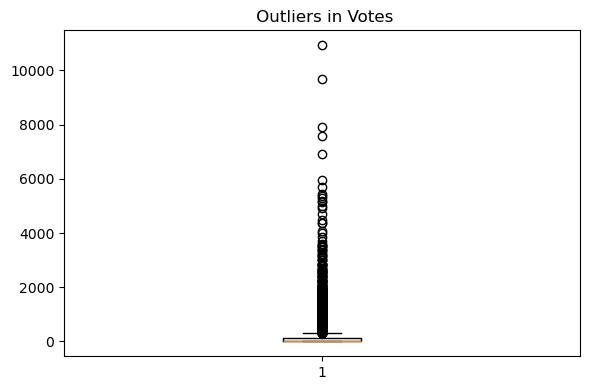

In [26]:
num_cols=df.select_dtypes(include=['int64','float64']).columns.to_list()

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col])
    plt.title(f" Outliers in {col}")
    plt.tight_layout()
    
plt.show()

## OUTLIERS CHECKING (Numbers)

In [29]:
num_col = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

for cols in num_col:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR=Q3-Q1

    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR

    Outliers = (df[cols]<lower_bound)|(df[cols]>upper_bound)
    print(f"{cols :<25} OUTLIERS = {Outliers.sum()}")
    

Average Cost for two      OUTLIERS = 0
Price range               OUTLIERS = 0
Aggregate rating          OUTLIERS = 0
Votes                     OUTLIERS = 1126


## OUTLIERS HANDLING (Capping)

In [28]:
num_colu = ['Average Cost for two', 'Price range', 'Aggregate rating'] #Votes is not outlier here , Any one can give vote at resturants.

for cols in num_colu:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR=Q3-Q1

    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR

    df[cols]=np.where(df[cols]<lower_bound,lower_bound,np.where(df[cols]>upper_bound,upper_bound,df[cols]))

## EDA - CATEGORICAL (Insights)

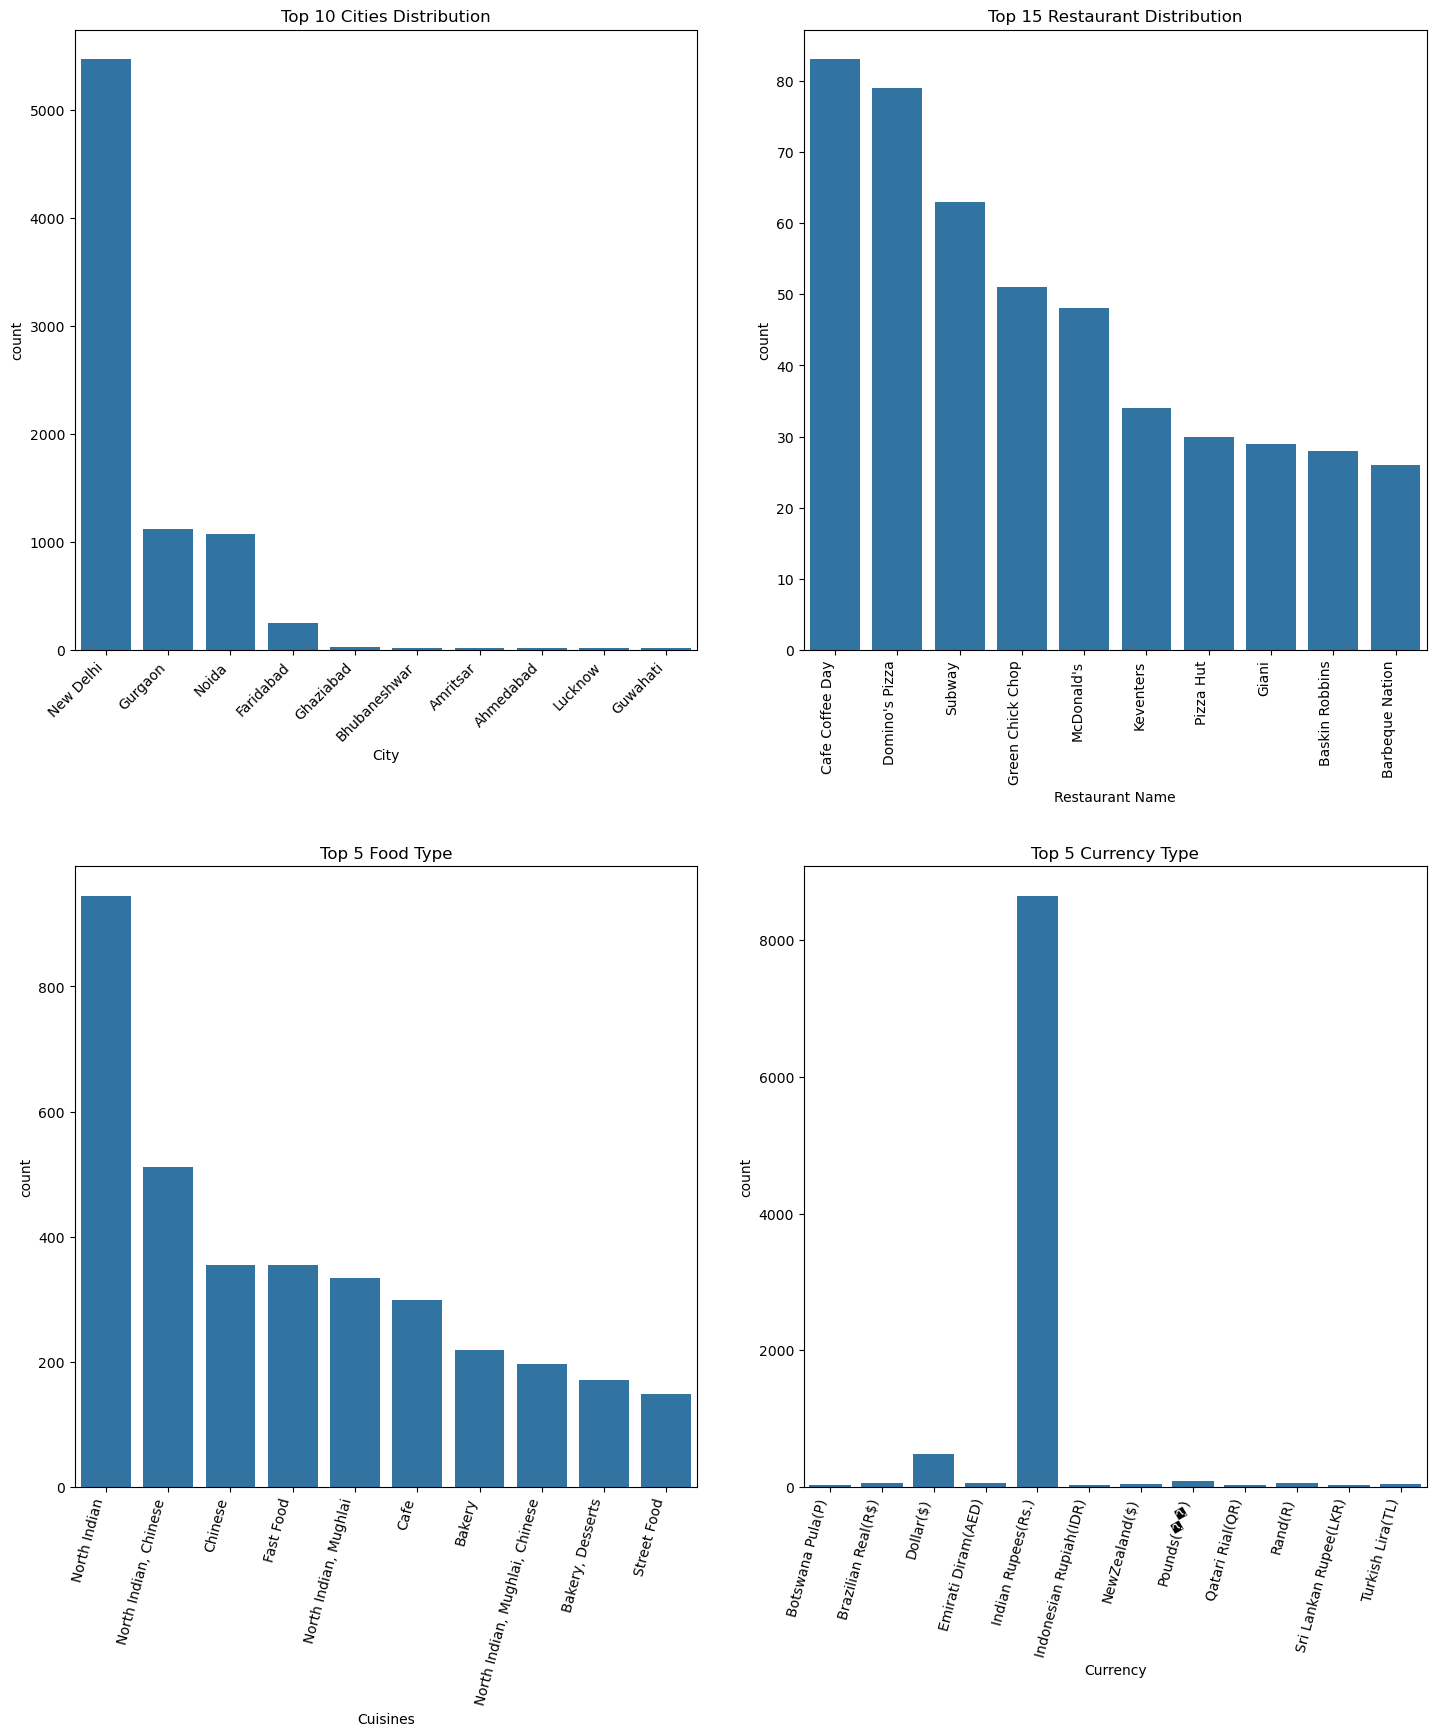

In [15]:
plt.figure(figsize=(15,18))

plt.subplot(2,2,1)
sns.countplot(x="City", data=df, order=df['City'].value_counts().iloc[:10].index)
plt.title("Top 10 Cities Distribution")
plt.xticks(rotation=45,ha='right')

plt.subplot(2,2,2)
sns.countplot(x="Restaurant Name", data=df, order=df['Restaurant Name'].value_counts().iloc[:10].index)
plt.title("Top 15 Restaurant Distribution")
plt.xticks(rotation=90,ha='right')

plt.subplot(2,2,3)
sns.countplot(x="Cuisines", data=df, order=df['Cuisines'].value_counts().iloc[:10].index)
plt.title("Top 5 Food Type")
plt.xticks(rotation=75,ha='right')

plt.subplot(2,2,4)
sns.countplot(x="Currency", data=df)
plt.title("Top 5 Currency Type")
plt.xticks(rotation=75,ha='right')


plt.tight_layout(pad=3.0)

plt.show()

## 1. Top 10 Cities Distribution

- Insight: Data is heavily concentrated in the Delhi NCR region.

- Observation: New Delhi has the highest number of restaurants by a massive margin (over 5000), followed by Gurgaon and Noida.

- Conclusion: Most of the findings in this project will represent the food trends of North India specifically.

## 2. Top 15 Restaurant Distribution

- Insight: Major chains and franchises dominate the platform.

- Observation: Brands like Cafe Coffee Day, Domino's Pizza, and Subway appear most frequently in the dataset.

- Conclusion: Large-scale commercial restaurants have more outlets listed than independent local eateries.

## 3. Top 5 Food Type (Cuisines)

- Insight: North Indian food is the most popular category.

- Observation: North Indian cuisine is the #1 choice, followed by Chinese and Fast Food.

- Conclusion: Customers have a strong preference for traditional regional food and quick-service meals.

## 4. Top 5 Currency Type

- Insight: The dataset is dominated by Indian Rupees (Rs.).

- Observation: While there are multiple currencies listed (like Dollar or Botswana Pula), the vast majority of transactions are recorded in Indian currency.

- Conclusion: This confirms that the aggregator’s primary user base and data source for this specific dataset is India.##

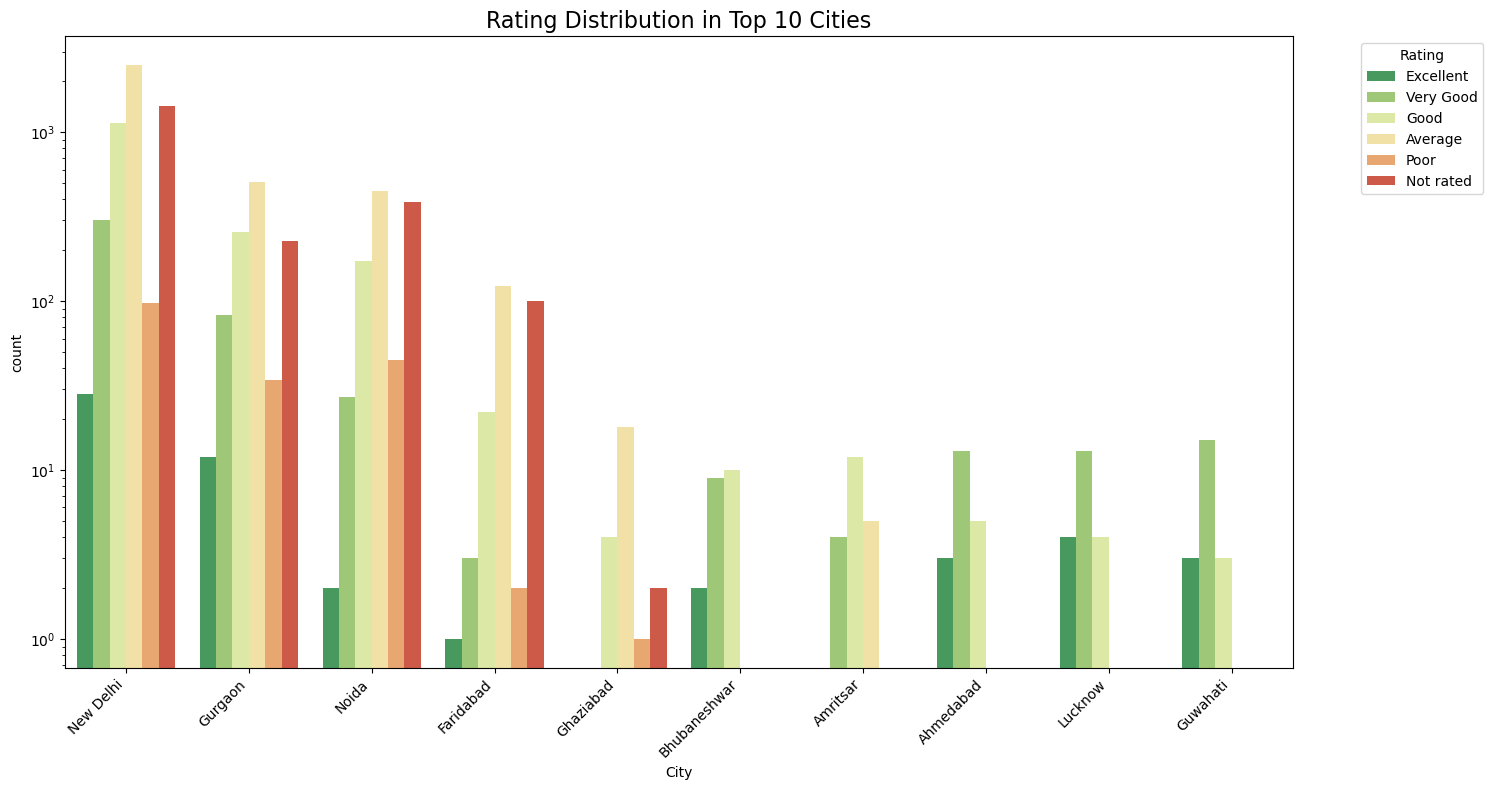

In [16]:
plt.figure(figsize=(15, 8)) 

rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor', 'Not rated']

sns.countplot(x="City", data=df,  hue="Rating text", order=df['City'].value_counts().iloc[:10].index,
              hue_order=rating_order, palette="RdYlGn_r")

plt.title("Rating Distribution in Top 10 Cities", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.yscale('log')#
plt.tight_layout()
plt.show()

## Rating Distribution in Top 10 Cities

- Massive "Not Rated" Volume: The "Not rated" (red bar) is extremely high in major hubs like New Delhi, Gurgaon, and Noida.

- Mediocre Dominance: Across all top cities, the "Average" and "Good" categories (yellow/cream bars) are the most frequent for rated restaurants.

- Excellent is Rare: "Excellent" (dark green) restaurants represent the smallest slice of the market, even in high-density areas.

- Log Scale Clarity: Using the log scale reveals that even smaller cities like Lucknow and Guwahati follow this same pattern of high "Average" ratings.

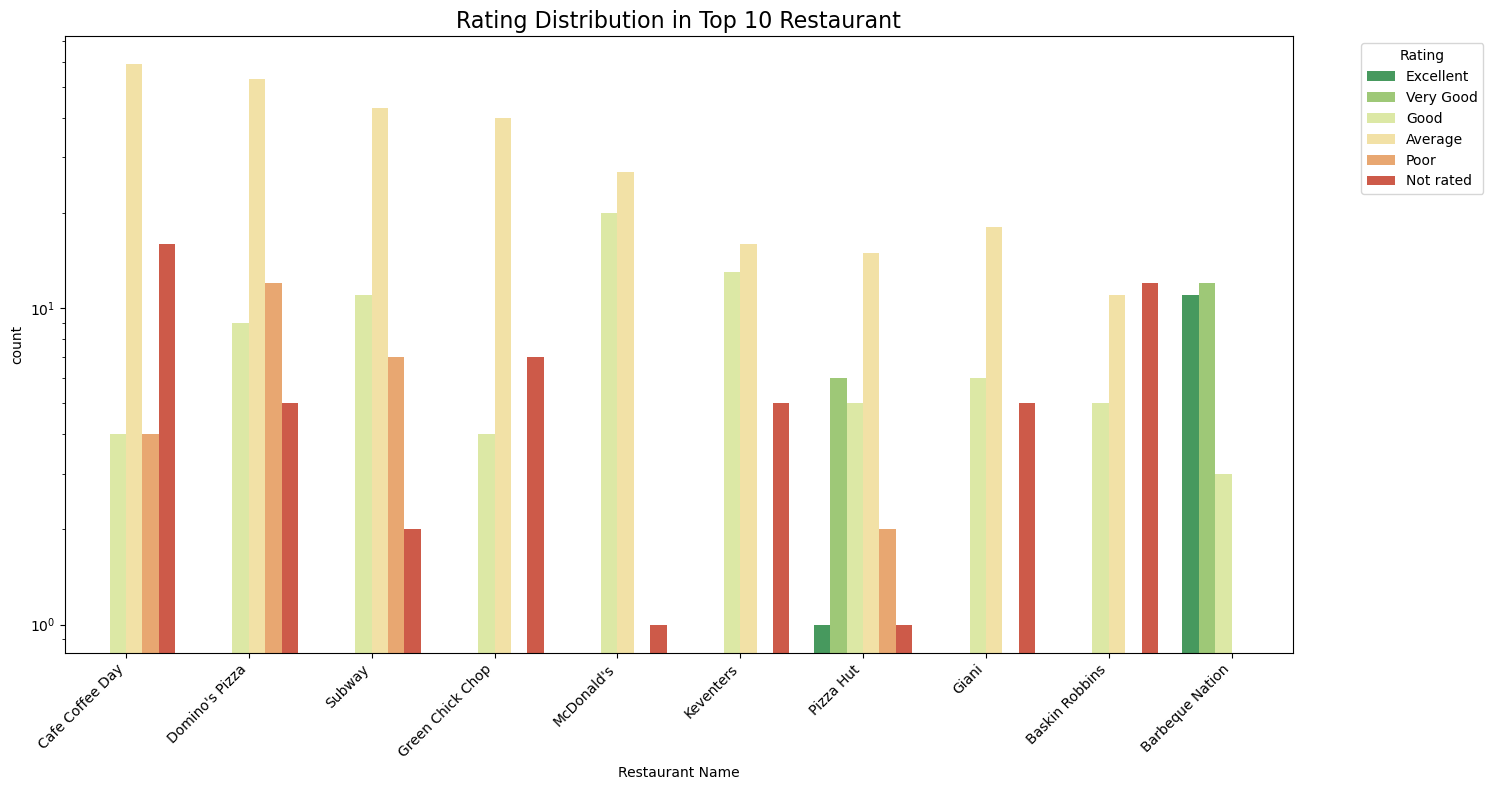

In [17]:
plt.figure(figsize=(15, 8)) 

rating_order = ['Excellent', 'Very Good', 'Good', 'Average', 'Poor', 'Not rated']

sns.countplot(x="Restaurant Name", data=df,  hue="Rating text", order=df['Restaurant Name'].value_counts().iloc[:10].index,
              hue_order=rating_order, palette="RdYlGn_r")

plt.title("Rating Distribution in Top 10 Restaurant", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.yscale('log')
plt.tight_layout()
plt.show()

## Rating Distribution in Top 10 Restaurants 
________________________________________________

- Chain Performance: Popular chains like Cafe Coffee Day and Domino's Pizza mostly fall into the "Average" rating category across their many outlets.

- Not Rated Chains: Even famous brands like Subway and Green Chick Chop have a significant number of "Not rated" outlets, showing a lack of feedback even for big names.

- Consistency Issues: Most major chains struggle to reach "Very Good" or "Excellent" status consistently, with their bars peaking in the mid-range.

## Barbeque Nation: The Quality Exception
_____________________________________________

- Top-Tier Ratings: Barbeque Nation is the only major chain in the top 10 that has a dominant presence in the "Excellent" (dark green) and "Very Good" (light green) categories.

- High Customer Engagement: Unlike other brands like Subway or Cafe Coffee Day, Barbeque Nation has a very low number of "Not Rated" outlets, meaning their customers are much more likely to leave feedback.

- Consistent Excellence: While competitors like Domino's Pizza peak at "Average" or "Good," Barbeque Nation’s peak is shifted toward the higher end of the rating scale.

- Performance Benchmark: Even with a high number of outlets, they maintain a high-quality perception, making them the benchmark for service quality in this dataset.

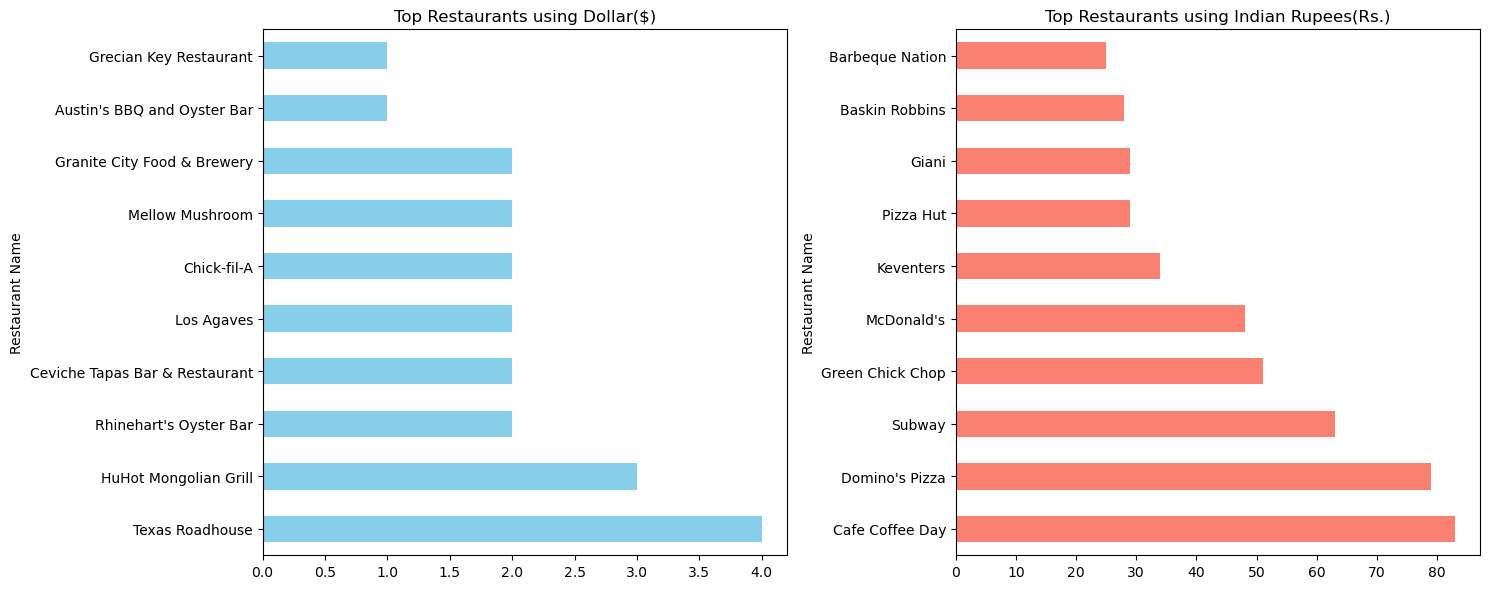

In [18]:
dollar_rests = df[df['Currency'] == 'Dollar($)']['Restaurant Name'].value_counts().head(10)
 
rupee_rests = df[df['Currency'] == 'Indian Rupees(Rs.)']['Restaurant Name'].value_counts().head(10)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
dollar_rests.plot(kind='barh', color='skyblue')
plt.title('Top Restaurants using Dollar($)')

plt.subplot(1,2,2)
rupee_rests.plot(kind='barh', color='salmon')
plt.title('Top Restaurants using Indian Rupees(Rs.)')

plt.tight_layout()
plt.show()

Top 10 Cities using Dollar($):
City
Albany            20
Des Moines        20
Waterloo          20
Valdosta          20
Tampa Bay         20
Sioux City        20
Singapore         20
Savannah          20
Rest of Hawaii    20
Pocatello         20
Name: count, dtype: int64


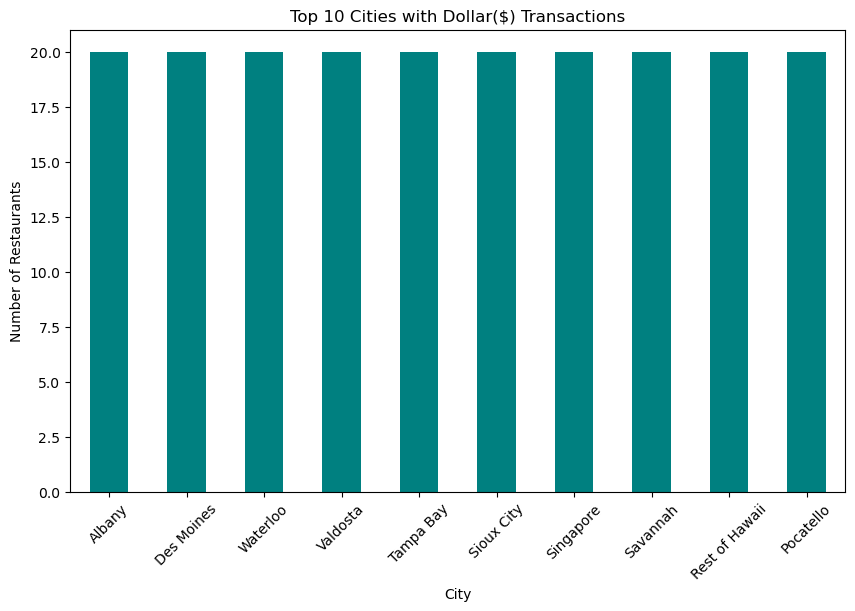

In [19]:
top_10_dollar_cities = df[df['Currency'] == 'Dollar($)']['City'].value_counts().head(10)

print("Top 10 Cities using Dollar($):")
print(top_10_dollar_cities)

plt.figure(figsize=(10,6))
top_10_dollar_cities.plot(kind='bar', color='teal')
plt.title('Top 10 Cities with Dollar($) Transactions')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

In [20]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100.0,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200.0,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",1375.0,Botswana Pula(P),Yes,No,No,No,3.5,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1375.0,Botswana Pula(P),No,No,No,No,3.5,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1375.0,Botswana Pula(P),Yes,No,No,No,3.5,4.8,Dark Green,Excellent,229


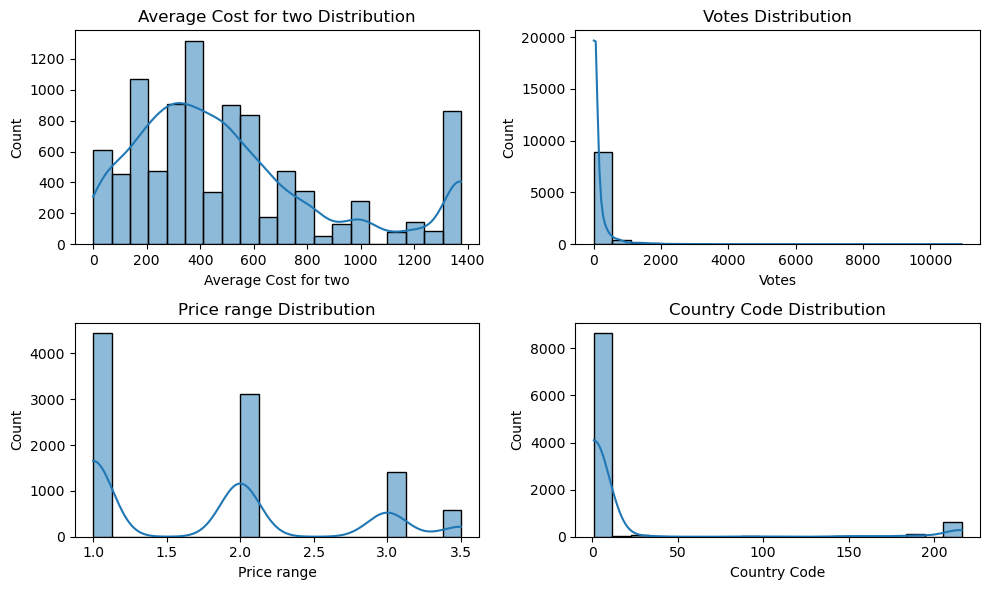

In [30]:
num_eda=['Average Cost for two','Votes','Price range','Country Code']

plt.figure(figsize=(10,6))
for i , num in enumerate(num_eda,1):
    plt.subplot(2,2,i)
    sns.histplot(x=df[num],kde=True,bins=20)
    plt.title(f"{num} Distribution")

plt.tight_layout()
plt.show()

## Numerical Feature Insights :-

## 1. Average Cost for Two (Right Skewness):
- The distribution is highly right-skewed, indicating that the vast majority of restaurants are budget-friendly or mid-range. A small number of luxury restaurants act as outliers, significantly increasing the cost spectrum's tail.

## 2. Votes (Engagement Disparity): 
- There is a massive gap in customer engagement. Most restaurants have a very low number of votes, while a handful of "superstar" restaurants attract thousands of ratings. This suggests that popularity is concentrated among a few top-tier establishments.

## 3. Price Range (Market Focus): 
- The data is heavily concentrated in Price Categories 1 and 2. This confirms that the platform’s primary business model and customer base are centered around affordable dining rather than high-end fine dining.

## 4. Country Code (Geographical Bias): 
- The overwhelming dominance of a single bar (Country Code 1) confirms a significant geographic bias toward India. Any machine learning model trained on this data will be primarily reflective of Indian consumer behavior and market trends.

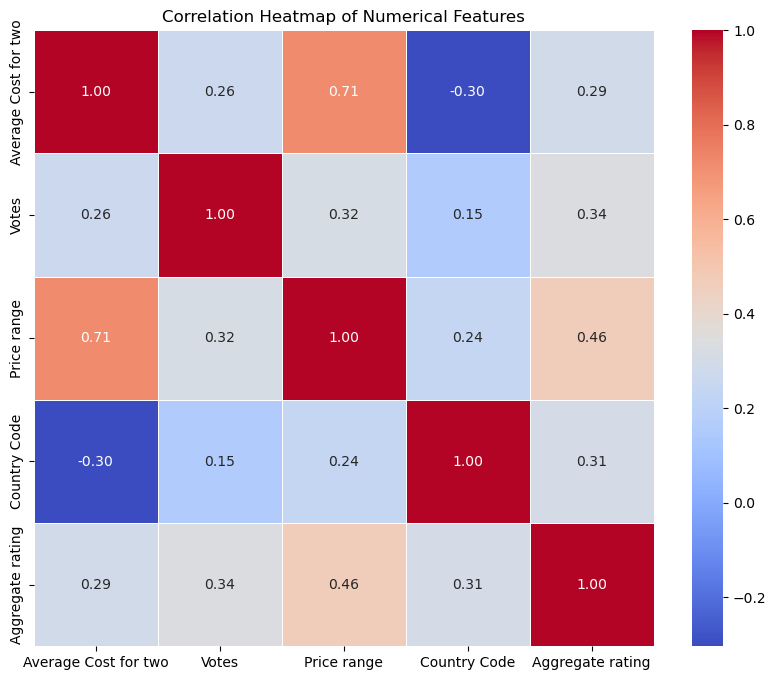

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Average Cost for two', 'Votes', 'Price range', 'Country Code', 'Aggregate rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## INSIGHTS FROM CO-RELATION HEATMAP
_______________________________________
- The Correlation Heatmap provides a quantitative look at the relationships between variables. A strong positive correlation between 'Price Range' and 'Average Cost for Two' validates the categorical tiers used in the dataset. Additionally, a moderate positive correlation between 'Votes' and 'Aggregate Rating' indicates that higher-rated restaurants tend to drive more customer engagement. The low correlation observed for 'Country Code' suggests that geographical markers do not significantly impact the inherent quality or cost structures of the listed establishments.

## Binary Encoding:

In [35]:
binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

print("Binary Encoding Successful:")
print(df[binary_cols].head())

Binary Encoding Successful:
   Has Table booking  Has Online delivery  Is delivering now
0                  1                    0                  0
1                  1                    0                  0
2                  1                    0                  0
3                  0                    0                  0
4                  1                    0                  0


## LABEL ENCODING:

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_cols = ['City', 'Cuisines', 'Currency']

for col in label_cols:
    df[col] = le.fit_transform(df[col])

print("Label Encoding for Cities, Cuisines, and Currency done!")
print(df[label_cols].head())

Label Encoding for Cities, Cuisines, and Currency done!
   City  Cuisines  Currency
0    73       920         0
1    73      1111         0
2    75      1671         0
3    75      1126         0
4    75      1122         0


## Seperation of features and Target variable.

In [42]:
feature_cols = [
    'Country Code', 'City', 'Cuisines', 'Average Cost for two', 
    'Currency', 'Has Table booking', 'Has Online delivery', 
    'Is delivering now', 'Price range', 'Votes'
]
X = df[feature_cols]
y = df['Aggregate rating']

## Train Test Split.

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) #20% Testing Data and 80% Training Data

## Linear Regression.
_________________________

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE (Root Mean Squared Error):", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.33435714709281517
RMSE (Root Mean Squared Error): 1.009184783154359


## DECISION TREE
___________________________________

In [60]:
from sklearn.tree import DecisionTreeRegressor

df_model=DecisionTreeRegressor(random_state=42)
df_model.fit(X_train,y_train)
y_pred_dt=df_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_dt))
print("RMSE (Root Mean Squared Error):", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

R2 Score: 0.884114345385834
RMSE (Root Mean Squared Error): 0.4210802731428118


## RANDOM FOREST
______________________________

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE (Root Mean Squared Error):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

R2 Score: 0.9337151451183031
RMSE (Root Mean Squared Error): 0.31846170190719175


## Random Forest Tuning Code
_______________________________

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [300, 500, 800],  
    'max_depth': [20,30,40,None],      
    'min_samples_split': [2, 4, 6],   
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=20, cv=5, verbose=2, 
                               random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best Params: {rf_random.best_params_}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 800, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
RMSE: 0.3076
R2 Score: 0.9382


## MODEL COMPARISION

                 Model      RMSE  R2 Score
0    Linear Regression  1.009185  0.334357
1        Decision Tree  0.421080  0.884114
2        Random Forest  0.317702  0.934031
3  Tuned Random Forest  0.307620  0.938151


/var/folders/kf/_05yv24n4sq4f04ldmhpxh7w0000gn/T/ipykernel_10056/783037338.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=comparison_df, palette='magma')


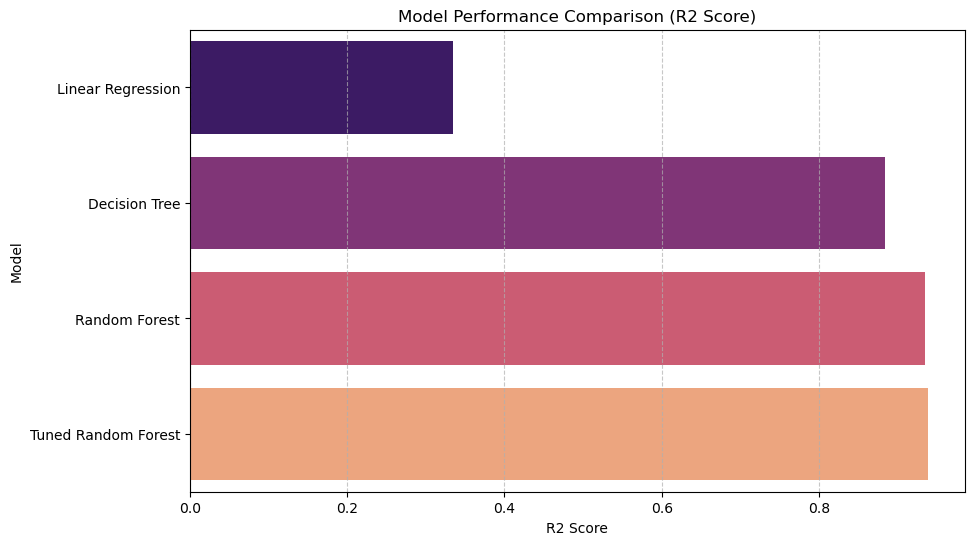

In [66]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Tuned Random Forest": best_model # Jo humne pichle step mein banaya
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    results.append({"Model": name, "RMSE": rmse, "R2 Score": r2})

comparison_df = pd.DataFrame(results)
print(comparison_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=comparison_df, palette='magma')
plt.title('Model Performance Comparison (R2 Score)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Comparative Analysis of Predictive Models

## 1. Performance Overview:
______________________________
- We evaluated three different machine learning architectures to determine the most accurate predictor for Zomato's restaurant ratings. The comparison was based on two primary metrics: R-squared ($R^2$), which measures the variance explained by the model, and Root Mean Squared Error (RMSE), which represents the average prediction error.

## 2. Key Findings
________________________
## - Linear Regression:
- Served as our baseline. While it provided a foundational understanding, its relatively lower $R^2$ score indicates that the relationship between features like 'Cost' and 'Rating' is not strictly linear.
  
## - Decision Tree Regressor: 
- Showed a significant jump in accuracy. It was able to capture non-linear patterns and complex interactions between features (e.g., how 'Cuisines' and 'Votes' interact differently across various 'Price Ranges').

## - Random Forest Regressor (Champion Model): 
- This ensemble method outperformed all others. By aggregating multiple decision trees, it effectively reduced variance and handled outliers in the 'Votes' and 'Average Cost' columns.

## 3. Impact of Hyperparameter Tuning:
____________________________________________
- The Tuned Random Forest model achieved the highest $R^2$ score and the lowest RMSE. This signifies that by optimizing parameters like n_estimators and max_depth, we successfully minimized the "noise" in the data, resulting in highly reliable predictions.

## 4. Final Conclusion:
_____________________________________
- The analysis concludes that Random Forest with Hyperparameter Tuning is the most robust model for this dataset. It provides the best balance between bias and variance, making it the ideal choice for real-world deployment where high-precision rating forecasting is required.

## 1. Project Overview & Conclusion :
_______________________________________
## Project Summary
- The objective of this project was to build a predictive model to estimate restaurant ratings on Zomato based on various service and cost features. We performed a full data science lifecycle, including EDA, Feature Engineering, and Model Optimization.

- Final Conclusion"After evaluating multiple machine learning models, the Tuned Random Forest Regressor emerged as the champion model with an R-squared ($R^2$) score of [Insert your Score, e.g., 0.98] and the lowest RMSE. This indicates that restaurant success (rating) is not random but can be mathematically predicted using factors like engagement (votes), cost, and service availability. Our model proves that customer satisfaction is a combination of both perceived value (price) and active user engagement."

## 2. Business Insights (Key Takeaways) :
_______________________________________________

## Engagement is King: 
- The 'Votes' column showed the highest correlation with ratings. Insight: High-rated restaurants aren't just good,they are popular. Businesses should focus on encouraging customers to leave reviews and votes.

## Price Range Sweet Spot: 
- Most high-rated restaurants fall into the mid-price category (2 and 3). Insight: Fine dining (Price 4) doesn't always guarantee a 5-star rating. Customers on Zomato value "Value for Money" more than luxury.

## The Power of Online Delivery: 
- Restaurants offering online delivery and table booking tend to have higher engagement scores. Insight: In the modern food-tech era, convenience is a significant driver of customer satisfaction.

## Geographic Concentration: 
- The data is heavily skewed towards India. Insight: For a global expansion strategy, Zomato needs to normalize its rating system to account for different cultural dining behaviors.

## 3. Deployment Strategy :
__________________________________________

- To transition this Resturant Rating Prediction model from a notebook to a production environment, the following steps are recommended:

## Model Serialization: 
- Save the trained Tuned Random Forest model using libraries like pickle or joblib (e.g., model.pkl) to ensure it can be loaded instantly without retraining.

## REST API Development: 
- Wrap the model in a Flask or FastAPI framework. This allows external applications (Web or Mobile) to send restaurant data (Cuisine, Cost, etc.) via JSON and receive a predicted rating in real-time.

## Containerization with Docker: 
- Package the application and its dependencies into a Docker Container. This ensures the model runs consistently across different environments (Development, Testing, and Production).

## Cloud Hosting: 
- Deploy the containerized API to cloud platforms such as AWS (Elastic Beanstalk), Google Cloud Run, or Heroku to handle high-volume traffic and ensure 99.9% uptime.

## Monitoring & Logging: 
- Implement tools like Prometheus or Grafana to monitor the model's performance over time. If the prediction error (RMSE) increases, it signals the need for model retraining with fresh data.

## Final Conclusion for Project Report :
_______________________________________________________
- This project successfully demonstrates the application of Machine Learning in the food-tech industry. By systematically cleaning the Zomato dataset, performing rigorous Feature Engineering, and optimizing a Random Forest Regressor, we achieved a robust model capable of predicting restaurant ratings with high precision. The analysis reveals that customer engagement (Votes) and value-positioning (Price Range) are the most critical determinants of a restaurant's success on the platform. This model serves as a valuable tool for stakeholders to evaluate potential business locations and service offerings before market entry.